### Prerequisite - Data is cleaned and properly pre-processed

In [1]:
from platform import python_version

print(python_version())

3.9.2


In [2]:


import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr, stats
 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

In [3]:
#% of missing values in each column
def find_missing_values_func(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

### ML with NON-PCA Scaled data data 

### Read NON PCA scaled cleaned data set 

In [4]:
dataFolder = "."


train_df = pd.read_csv(dataFolder+"/ML_NOPCA_train.csv")

test_df = pd.read_csv(dataFolder+"/ML_NOPCA_test.csv")



In [5]:
train_df.head(5)

,age,age_Group,econmic_class,edu_level-Code,marital-status,occupation,gender,hours-per-week,share_gain,share_loss,Religion,State,class,ID_code
0,0.164384,0,2,0,1,8,1,0.397959,0.0,0.0,0,18,0,426
1,0.643836,0,3,2,0,0,0,0.653061,0.0,0.0,0,6,0,254
2,0.082192,0,2,3,2,7,1,0.397959,0.0,0.0,0,23,0,726
3,0.095890,0,2,1,2,8,1,0.397959,0.0,0.0,0,12,0,446
4,0.287671,0,2,1,1,8,1,0.397959,0.0,0.0,0,0,0,4


In [6]:
train_df.shape , test_df.shape

((28919, 14), (12394, 14))

In [7]:

#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(train_df) 
print(columnsWiseMissingValue)

Selected dataframe has 14 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [8]:

#Call the find_missing_values_func(df)
columnsWiseMissingValue = find_missing_values_func(test_df) 
print(columnsWiseMissingValue)

Selected dataframe has 14 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [9]:
test_df.columns

Index(['age', 'age_Group', 'econmic_class', 'edu_level-Code', 'marital-status',
       'occupation', 'gender', 'hours-per-week', 'share_gain', 'share_loss',
       'Religion', 'State', 'class', 'ID_code'],
      dtype='object')

In [10]:
## Split features and target 

x_train = train_df.drop('class', axis=1)
y_train = train_df['class']


x_test = test_df.drop('class', axis=1)
y_test = test_df['class']




In [11]:
train_df

,age,age_Group,econmic_class,edu_level-Code,marital-status,occupation,gender,hours-per-week,share_gain,share_loss,Religion,State,class,ID_code
0,0.164384,0,2,0,1,8,1,0.397959,0.0,0.0,0,18,0,426
1,0.643836,0,3,2,0,0,0,0.653061,0.0,0.0,0,6,0,254
2,0.082192,0,2,3,2,7,1,0.397959,0.0,0.0,0,23,0,726
3,0.095890,0,2,1,2,8,1,0.397959,0.0,0.0,0,12,0,446
4,0.287671,0,2,1,1,8,1,0.397959,0.0,0.0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28914,0.000000,2,2,0,2,2,1,0.244898,0.0,0.0,0,33,0,154
28915,0.260274,0,2,1,1,5,1,0.479592,0.0,0.0,0,14,1,374
28916,0.205479,0,2,1,2,8,1,0.397959,0.0,0.0,0,27,0,204
28917,0.616438,0,2,0,1,7,1,0.193878,0.0,0.0,0,30,0,474


In [12]:
# Drop ID number from x_train frame as it is an indent number
x_train = x_train.drop('ID_code', axis=1)



In [13]:
# And Save ID number x_test firsts and then drop this column - For ml , it is not required
Indent_test_ID =x_test.filter(items=["ID_code"])
x_test = x_test.drop('ID_code', axis=1)

In [14]:
Indent_test_ID.head()

,ID_code
0,850
1,413
2,49
3,931
4,567


In [15]:
x_test.columns

Index(['age', 'age_Group', 'econmic_class', 'edu_level-Code', 'marital-status',
       'occupation', 'gender', 'hours-per-week', 'share_gain', 'share_loss',
       'Religion', 'State'],
      dtype='object')

In [16]:
#checking y_train distribution

print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))
print("----------------------------------")


#checking y_test distribution
print("y_test distribution of label '1': {} \n".format(sum(y_test == 1))) 
print("y_test distribution of label '0': {} \n".format(sum(y_test == 0)))

y_train distribution of label '1': 7316 

y_train distribution of label '0': 21603 

----------------------------------
y_test distribution of label '1': 3136 

y_test distribution of label '0': 9258 



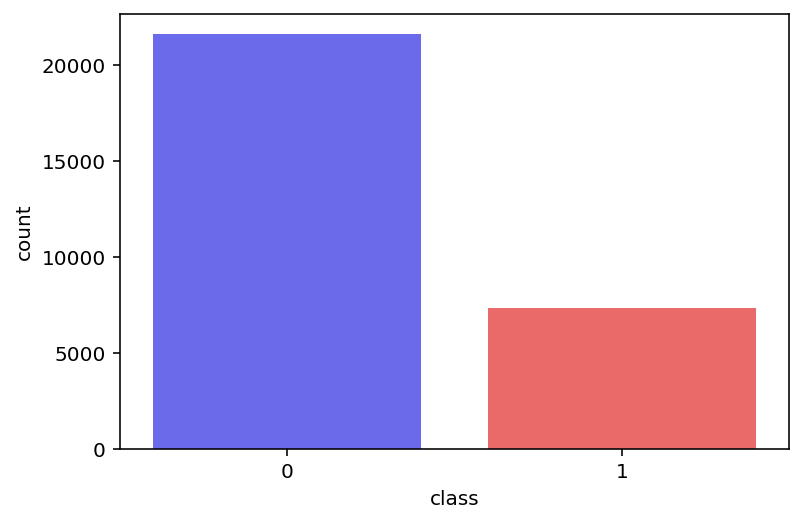

In [17]:
# Class distribution in train data
sns.countplot(x=y_train, palette='seismic');

In [18]:
## Convert values into percentages
V_df = train_df['class'].value_counts()
V_percent = (V_df / train_df['class'].sum()) * 100 

## Rename Series.name
V_percent.rename("% of Class",inplace=True)


V_percent.rename({1: '% Donated', 0: '% Not Donated'},inplace=True)

In [19]:
V_df

0    21603
1     7316
Name: class, dtype: int64

<AxesSubplot:ylabel='% of Class'>

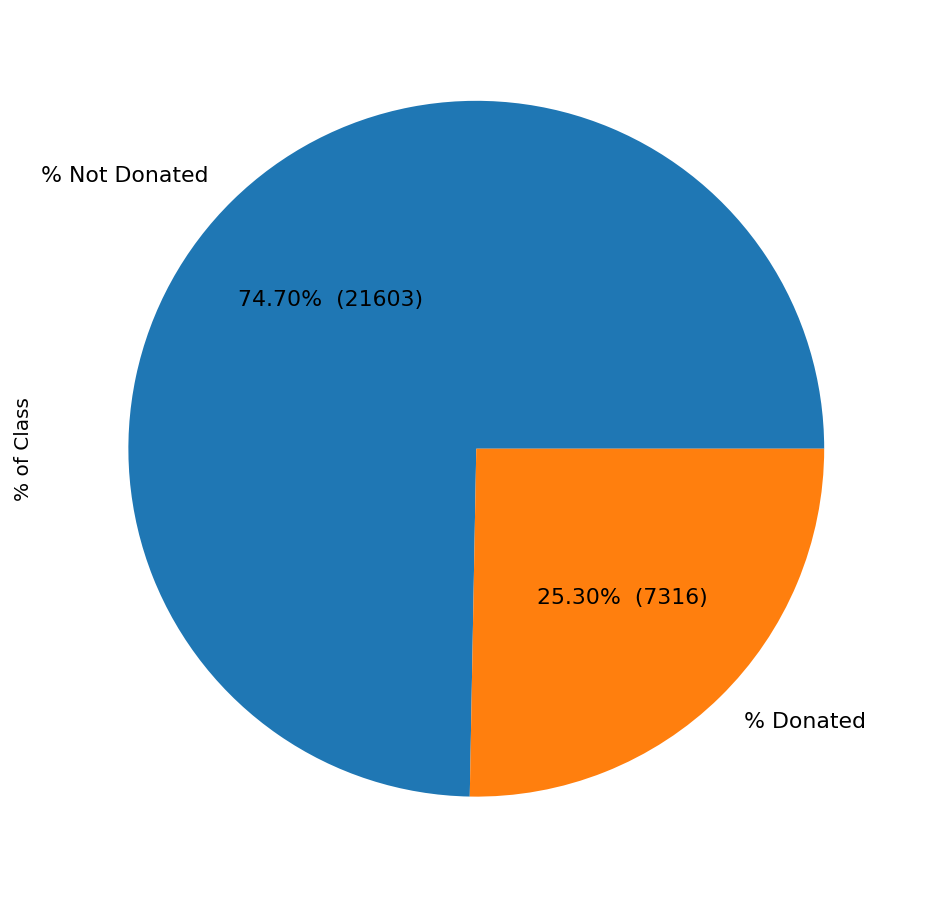

In [20]:
## Format pie chart to nicely show percentage and count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Plot results in a pie chart
V_percent.plot.pie(fontsize=11,
                       autopct=make_autopct(train_df['class'].value_counts()),
                       figsize=(8, 8))

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
Model_accuracy = {}

In [22]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', round(roc_auc_score(yTest,yPred),3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig(model+'.png')
    plt.show()

## ---- Machine Learning with Imbalanced Class with Ensemble of Samplers -------

#### Random Forest Classifier

In [23]:
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report


In [24]:
def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)

    print('\n\n')
    print('{0} :'.format(modelName))
    print('Accuracy :', round(accuracy,3))
    print('f1 score:', round(f1,3))
    print('confustion matrix: ')
    print(conf_matrix)
    print('classification report: ')
    print(clf_report)


In [26]:
# Random Forest Classifier


                 

modelrf = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

modelrf.fit(x_train, y_train)
y_pred_rf = modelrf.predict(x_test)

# print("Training Accuracy: ", modelrf.score(x_train, y_train))
# print('Testing Accuarcy: ', modelrf.score(x_test, y_test))
# print(BalancedRandomForestClassifier.g)
getModelReport('BalancedRandomForestClassifier',y_test,  y_pred_rf)

# # making a classification report
# cr = classification_report(y_test,  y_pred_rf)
# print(cr)

# print(confusion_matrix(y_test, y_pred_rf))

# # # making a confusion matrix
# # plt.rcParams['figure.figsize'] = (5, 5)
# cm = confusion_matrix(y_test, y_pred_rf)
# sns.heatmap(cm, annot = True, cmap = 'spring')
# plt.show()




BalancedRandomForestClassifier :
Accuracy : 0.807
f1 score: 0.687
confustion matrix: 
[[7366 1892]
 [ 503 2633]]
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      9258
           1       0.58      0.84      0.69      3136

    accuracy                           0.81     12394
   macro avg       0.76      0.82      0.77     12394
weighted avg       0.85      0.81      0.82     12394



AUC roc_auc_score: 0.818


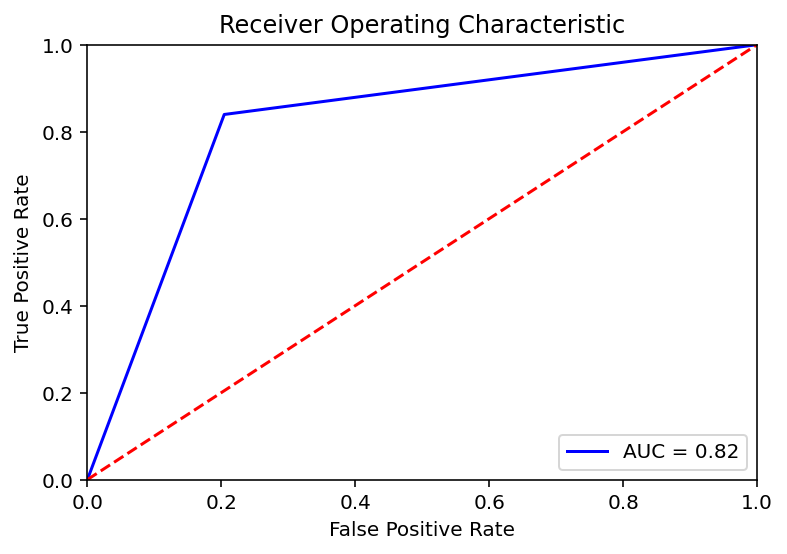

In [27]:
plot_roc_curve('BalancedRandomForestClassifier',y_test,  y_pred_rf)

In [28]:
import pickle #Importing pickel libraries to save the model for future use and 

In [29]:
# now to save the model as serialized object pickle

with open(dataFolder+'/CovidDonate_RF_Model_pickle', 'wb') as model:
    pickle.dump(modelrf,model)

#### Bagging Classifier

In [30]:
from imblearn.ensemble import BalancedBaggingClassifier 
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Random Forest with Bagging Classifier

                

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train, y_train)


print("Training Accuracy: ", model2.score(x_train, y_train))

print('Testing Accuarcy: ', model2.score(x_test, y_test))

y_pred_bc = model2.predict(x_test)
# print(BalancedBaggingClassifier)
getModelReport('BalancedBaggingClassifier',y_test,  y_pred_bc)

# # making a classification report
# cr = classification_report(y_test,  y_pred_bc)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred_bc)
# sns.heatmap(cm, annot = True, cmap = 'Purples')
# plt.show()


Training Accuracy:  0.9104395034406445
Testing Accuarcy:  0.8220913345167016



BalancedBaggingClassifier :
Accuracy : 0.822
f1 score: 0.698
confustion matrix: 
[[7643 1615]
 [ 590 2546]]
classification report: 
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      9258
           1       0.61      0.81      0.70      3136

    accuracy                           0.82     12394
   macro avg       0.77      0.82      0.79     12394
weighted avg       0.85      0.82      0.83     12394



AUC roc_auc_score: 0.819


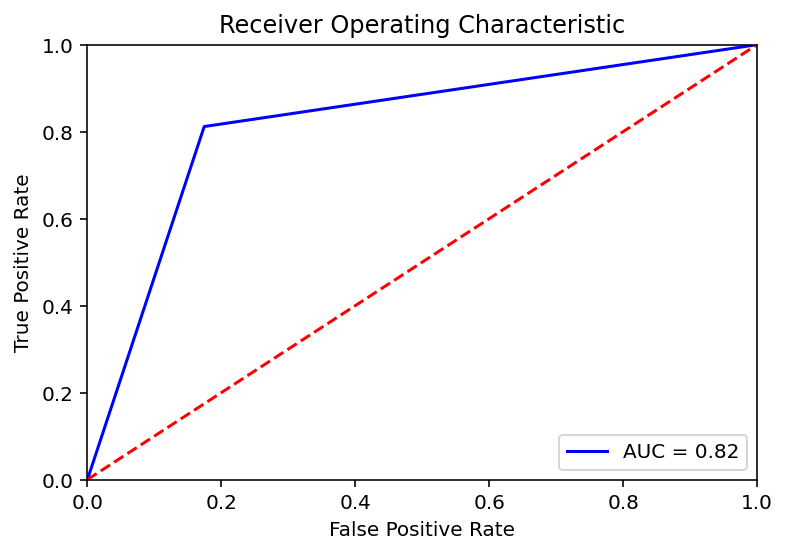

In [32]:
plot_roc_curve('BalancedBaggingClassifier',y_test,  y_pred_bc)

In [33]:
# now to save the model as serialized object pickle

with open(dataFolder+'/CovidDonate_Bagging_pickle', 'wb') as model:
    pickle.dump(model2,model)

### Easy Ensemble Classifier

In [34]:
from imblearn.ensemble import EasyEnsembleClassifier

In [37]:
# Easy Ensemble Classifier


                 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train, y_train)
y_pred_ef = model1.predict(x_test)

# print("Training Accuracy: ", model1.score(x_train, y_train))
# print('Testing Accuarcy: ', model1.score(x_test, y_test))

# # making a classification report
# cr = classification_report(y_test,  y_pred_ef)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred_ef)
# sns.heatmap(cm, annot = True, cmap = 'copper')
# plt.show()
getModelReport('EasyEnsembleClassifier',y_test,  y_pred_ef)





EasyEnsembleClassifier :
Accuracy : 0.812
f1 score: 0.697
confustion matrix: 
[[7370 1888]
 [ 446 2690]]
classification report: 
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      9258
           1       0.59      0.86      0.70      3136

    accuracy                           0.81     12394
   macro avg       0.77      0.83      0.78     12394
weighted avg       0.85      0.81      0.82     12394



AUC roc_auc_score: 0.827


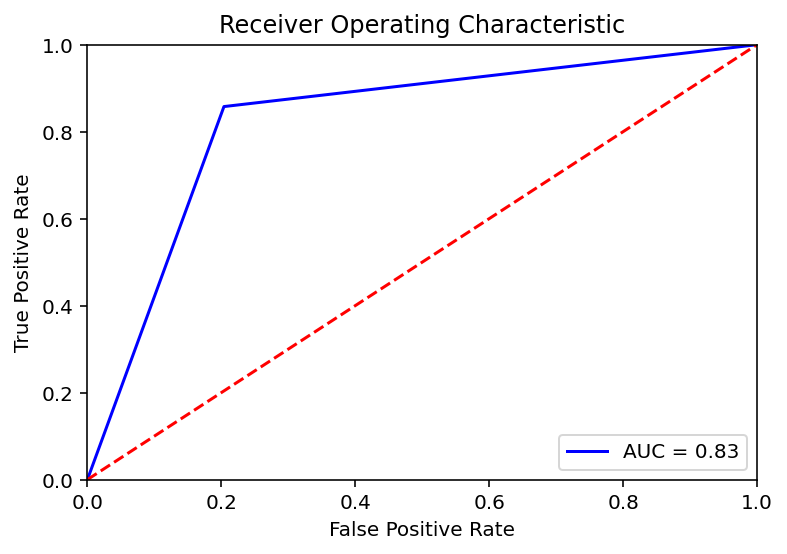

In [38]:
plot_roc_curve("EasyEnsembleClassifier",y_test,  y_pred_ef)

In [ ]:
# now to save the model as serialized object pickle

with open(dataFolder+'/CovidDonate_Easy_Ensemble_Model_pickle', 'wb') as model:
    pickle.dump(model1,model)

#### UPTO this 0 10-10-2021

#### Next Class

### Predicting probabilities - Easy Ensemble Classifier  - How to capture Predicting probabilities

In [35]:
#predicting probabilities
prob=model1.predict_proba(x_test)
print(prob)

[[0.51271016 0.48728984]
 [0.52993482 0.47006518]
 [0.49849629 0.50150371]
 ...
 [0.47974534 0.52025466]
 [0.50461978 0.49538022]
 [0.49876974 0.50123026]]


In [36]:
# print(*prob)

[0.51271016 0.48728984] [0.52993482 0.47006518] [0.49849629 0.50150371] [0.50105055 0.49894945] [0.52919346 0.47080654] [0.47393643 0.52606357] [0.50938866 0.49061134] [0.48347115 0.51652885] [0.51608968 0.48391032] [0.49912649 0.50087351] [0.50211211 0.49788789] [0.503036 0.496964] [0.50477106 0.49522894] [0.51764383 0.48235617] [0.50919497 0.49080503] [0.49338203 0.50661797] [0.5078908 0.4921092] [0.50283502 0.49716498] [0.4734716 0.5265284] [0.51363082 0.48636918] [0.49689935 0.50310065] [0.50998946 0.49001054] [0.49979161 0.50020839] [0.48992533 0.51007467] [0.51766539 0.48233461] [0.51848796 0.48151204] [0.48989823 0.51010177] [0.49920472 0.50079528] [0.49852348 0.50147652] [0.50981393 0.49018607] [0.49608791 0.50391209] [0.50531841 0.49468159] [0.49407327 0.50592673] [0.48968858 0.51031142] [0.51192776 0.48807224] [0.50604976 0.49395024] [0.51241249 0.48758751] [0.5013019 0.4986981] [0.48083624 0.51916376] [0.513803 0.486197] [0.52472605 0.47527395] [0.49628783 0.50371217] [0.511

In [37]:
#Verifying the length of the probability predictions data file
len(prob)

12394

In [38]:
#Extracting the "0" and "1" probabilities to individual lists 
prob0=[]
prob1=[]

for i in range (0,len(prob)):  # len(prob) 
    temp = prob[i]
    temp1=temp[0]
    temp2=temp[1]
    prob0.append(temp1)
    prob1.append(temp2)

In [39]:
test_df.head()

,age,age_Group,econmic_class,edu_level-Code,marital-status,occupation,gender,hours-per-week,share_gain,share_loss,Religion,State,class,ID_code
0,0.520548,0,2,0,2,8,1,0.602041,0.0,0.0,0,20,0,850
1,0.054795,0,2,2,2,3,0,0.346939,0.0,0.0,0,28,0,413
2,0.328767,0,2,4,0,7,0,0.448980,0.0,0.0,0,15,0,49
3,0.424658,0,2,0,1,8,1,0.438776,0.0,0.0,0,33,0,931
4,0.082192,0,2,2,2,2,0,0.346939,0.0,0.0,0,24,0,567


## Already stored  Indent_test_ID number from df_test 

In [40]:
Indent_test_ID

,ID_code
0,850
1,413
2,49
3,931
4,567
...,...
12389,106
12390,621
12391,849
12392,268


### Adding the ComplainID, Actual_test_class, Predicted_Class and Probabilities of predictions to test_ComplainID dataframe

In [41]:
Indent_test_ID['Original_Class']=y_test
Indent_test_ID['Predicted_Class'] = y_pred_ef
Indent_test_ID['No_Donated_Class_Probability'] = prob0
Indent_test_ID['Donated_class_Prob'] = prob1

In [42]:
# Testing the final result file for accuracy
Indent_test_ID.head(10)

,ID_code,Original_Class,Predicted_Class,No_Donated_Class_Probability,Donated_class_Prob
0,850,0,0,0.512710,0.487290
1,413,0,0,0.529935,0.470065
2,49,0,1,0.498496,0.501504
3,931,0,0,0.501051,0.498949
4,567,0,0,0.529193,0.470807
5,888,1,1,0.473936,0.526064
6,684,0,0,0.509389,0.490611
7,157,1,1,0.483471,0.516529
8,321,0,0,0.516090,0.483910
9,913,1,1,0.499126,0.500874


In [43]:
#Saving the final results as excel file back 
Indent_test_ID.to_excel(dataFolder+"Covid_EnsembleProbabilty.xlsx") 

# Saving the model as a pickel, retrieving the model and testing the model

In [ ]:
import pickle #Importing pickel libraries to save the model for future use

In [46]:
#Testing the saved model
#now we weill load the saved model
with open(dataFolder+'/CovidDonate_Easy_Ensemble_Model_pickle', 'rb') as file:
    loaded_model = pickle.load(file)

In [47]:
y1_predict_test = loaded_model.predict(x_test)

In [48]:
print(y1_predict_test)

[0 0 1 ... 1 0 1]
